log(0.5): -0.6931471805599453
log(0.3): -1.2039728043259361


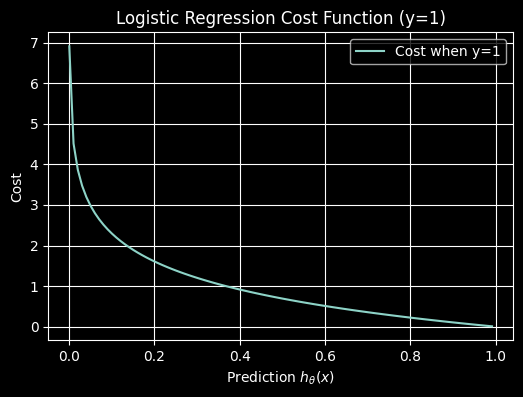

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 简单的对数计算测试
print("log(0.5):", np.log(0.5))
print("log(0.3):", np.log(0.3))

# 2. 绘制 y=1 时的代价函数曲线
# 定义 x 轴数据：预测值 (0 到 1 之间，不包含 0)
x = np.arange(0.001, 1, 0.01)

# 定义 y 轴数据：代价 (Cost)
y_cost = -np.log(x)

# 绘图
plt.figure(figsize=(6, 4))
plt.plot(x, y_cost, label='Cost when y=1')
plt.title('Logistic Regression Cost Function (y=1)')
plt.xlabel('Prediction $h_\\theta(x)$')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

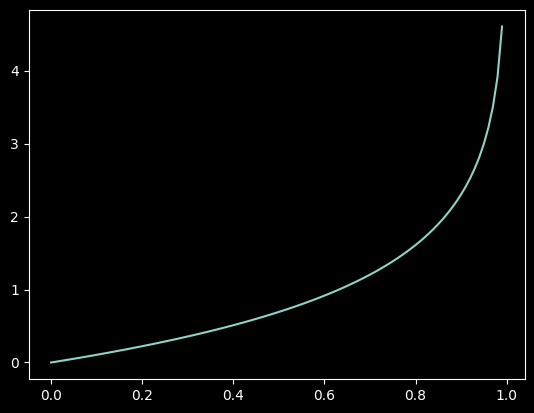

In [6]:
x=np.arange(0,1,0.01)
import matplotlib.pyplot as plt
plt.plot(x,-np.log(1-x))
plt.show()

In [9]:
import numpy as np
import pandas as pd

In [10]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
:return: NOne
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv(
    "../day14/data/breast-cancer-wisconsin.csv",
    names=column)
# print(data) #想看可以解除
# 当你读取数据时，看上去是数值的列，读进来是字符串，说明里边
# 存在了非数值情况
print(data.info())
print(data.describe(include='all'))

<class 'pandas.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    str  
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(10), str(1)
memory usage: 60.2 KB
None
        Sample code number  Clump Thickness  Uniformity of Cell Size  \
count         6.990000e+02       699.000000          

In [11]:
data['Bare Nuclei'].unique() #因为上面发现它是object类型

<StringArray>
['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6']
Length: 11, dtype: str

In [12]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
#直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()
print('-' * 50)
print(data.shape)

--------------------------------------------------
(683, 11)


In [13]:
data.info()

<class 'pandas.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    str  
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(10), str(1)
memory usage: 64.0 KB


In [14]:
column[6]

'Bare Nuclei'

In [15]:
data[column[6]]=data[column[6]].astype(int)

In [16]:
data.info()

<class 'pandas.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
# 进行数据的分割，第零列是编号，不可以作为特征，把第1-9列作为特征，第10列作为标签
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,
                                                    random_state=1)

# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train) # 训练集标准化
x_test = std.transform(x_test) # 测试集标准化
x_train[0]

array([-1.21629973, -0.70863282, -0.75174943,  0.04301674, -0.55657068,
       -0.71054972, -0.99312055, -0.62911518, -0.36280962])

In [20]:
from sklearn.linear_model import LogisticRegression

# 1. 实例化逻辑回归估计器
# C=0.5: 正则化力度（防止过拟合）
# solver='lbfgs': 优化算法（梯度下降的具体实现方式）
lg = LogisticRegression(C=0.5, solver='lbfgs')

# 2. 模型训练（fit）
# 让机器根据训练集的特征(x)和标签(y)寻找规律（寻找最佳的分界线）
lg.fit(x_train, y_train)

# 3. 查看权重参数（可选）
# 这就是模型学到的 "W"，对应每个特征的重要性
print(lg.coef_)

# 4. 进行预测
y_predict = lg.predict(x_test)
print(y_predict) # 打印预测出来的类别（比如 2或4，或者 0或1）

# 5. 模型评估
# 直接计算准确率：预测对的数量 / 总测试数量
print("准确率：", lg.score(x_test, y_test))

# 6. 对比查看
print(y_test[0:5]) # 看看真实值的前5个
print('-'*50)

# 7. 查看预测概率
# 相比于直接通过/不通过，这里显示的是具体的概率值
print(lg.predict_proba(x_test)[0:5])

[[1.11400191 0.25293086 0.78938469 0.60986034 0.0728013  1.10834397
  0.7794668  0.64312128 0.67692658]]
[2 2 2 4 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 4 4 2 4 2
 2 4 4 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 4 2 4
 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2]
准确率： 0.9824561403508771
444    2
24     2
195    2
49     4
375    2
Name: Class, dtype: int64
--------------------------------------------------
[[0.94893919 0.05106081]
 [0.99494175 0.00505825]
 [0.98365149 0.01634851]
 [0.02707911 0.97292089]
 [0.99732446 0.00267554]]


In [21]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# 1. 打印详细的分类报告
# 为什么还要看下召回率？因为在癌症预测中，漏诊（召回率低）后果很严重
# labels=[2, 4]: 指定我们要关注的类别标签（原数据中 2=良性, 4=恶性）
# target_names: 给这些标签起个好听的名字，方便阅读报告
print(classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))

# 2. 计算 AUC 指标
# AUC 计算要求是二分类，不需要标签必须是 0 和 1，只要是两个不同的类别即可
# AUC 越接近 1，说明模型越完美；0.5 表示瞎猜
print("AUC指标：", roc_auc_score(y_test, y_predict))

# 3. 查看数据形状 (检查一下训练集和测试集的大小)
print(x_train.shape) # 应该是 (512, 9)
print(x_test.shape)  # 应该是 (171, 9)

# 4. 简单的数学计算 (图片最底部的代码)
# 计算 -ln(0.1)，用于理解当预测概率为0.1时的Log Loss代价
print(-np.log(0.1))

              precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标： 0.975
(512, 9)
(171, 9)
2.3025850929940455
